**Link del repositorio:**  https://gitlab.com/jhas.lopez24-group/bootcamp_ml_3_andrea_martinez/-/tree/ac23a8147932609ce6446e29ea2b33d91652f141/Actividad%201%20Proyecto%20de%20Python

**Fecha:** 08/06/2025  
**Autor:** Andrea Jasmin Martinez Lopez

**Generamos los import necesarios para el procesamiento de nuestro dataset**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as mticker
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import LabelEncoder

**Leemos nuestro dataset**

In [3]:
df = pd.read_csv('tourism_dataset.csv')
print(df.head())

     Location Country    Category  Visitors  Rating    Revenue  \
0  kuBZRkVsAR   India      Nature    948853    1.32   84388.38   
1  aHKUXhjzTo     USA  Historical    813627    2.01  802625.60   
2  dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11   
3  DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60   
4  WJCCQlepnz  France    Cultural    124867    1.43  547893.24   

  Accommodation_Available  
0                     Yes  
1                      No  
2                     Yes  
3                     Yes  
4                      No  


**mostramos la informacion de nuestro dataset**

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location                 5989 non-null   object 
 1   Country                  5989 non-null   object 
 2   Category                 5989 non-null   object 
 3   Visitors                 5989 non-null   int64  
 4   Rating                   5989 non-null   float64
 5   Revenue                  5989 non-null   float64
 6   Accommodation_Available  5989 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 327.7+ KB
None


In [5]:
df.tail()

,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
5984,xAzwnVKAqz,USA,Urban,828137,1.97,132848.78,No
5985,IfKotyaJFC,France,Nature,276317,3.53,325183.96,Yes
5986,bPyubCWGgA,Egypt,Beach,809198,3.37,927336.50,No
5987,kkWIucpBnu,Egypt,Cultural,808303,2.52,115791.43,Yes
5988,gHXUrdticm,France,Cultural,40939,4.65,957026.85,Yes


**Mostramos las columnas y sus tipos**

In [6]:
df.columns

Index(['Location', 'Country', 'Category', 'Visitors', 'Rating', 'Revenue',
       'Accommodation_Available'],
      dtype='object')

In [7]:
df.dtypes

Location                    object
Country                     object
Category                    object
Visitors                     int64
Rating                     float64
Revenue                    float64
Accommodation_Available     object
dtype: object

**mostramos los valores unicos por columna**

In [8]:
df.nunique()

Location                   5989
Country                       7
Category                      6
Visitors                   5969
Rating                      401
Revenue                    5989
Accommodation_Available       2
dtype: int64

**mostramos la suma de nulos por columna**

In [9]:
df.isnull().sum()

Location                   0
Country                    0
Category                   0
Visitors                   0
Rating                     0
Revenue                    0
Accommodation_Available    0
dtype: int64

**funcion que nos ayuda a poder darle formato a nuestro conteo de visitantes**

In [16]:
def human_format(num, pos):
    if num >= 1_000_000:
        return f"{num / 1_000_000:.1f}M"
    elif num >= 1_000:
        return f"{num / 1_000:.1f}K"
    else:
        return str(num)

**Agrupar por país y sumar el número de visitantes**

In [17]:
country_visits = df.groupby("Country")["Visitors"].sum().reset_index()

# Ordenar por número de visitantes
country_visits = country_visits.sort_values(by="Visitors", ascending=False)

**Graficamos la cantidad de personas por pais**

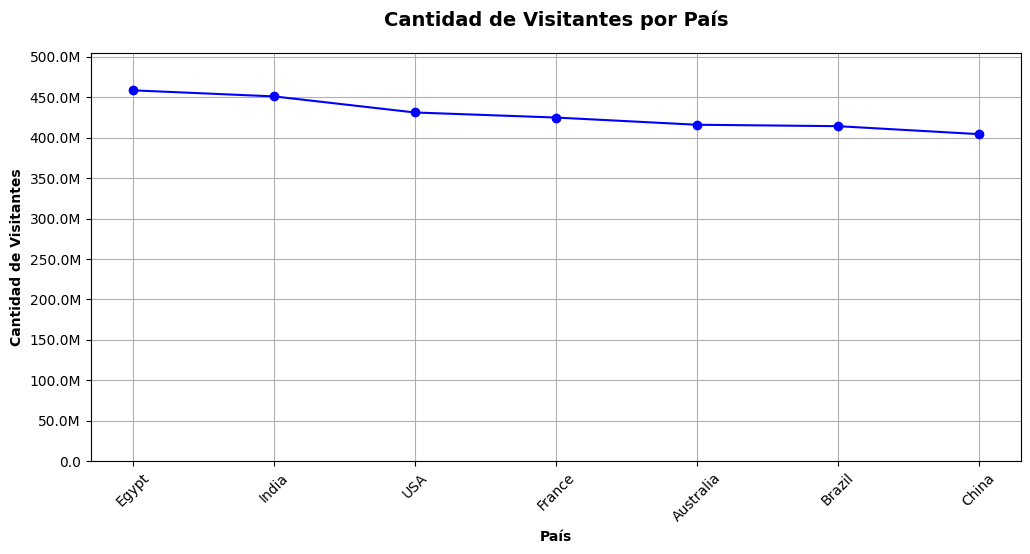

In [41]:
# Crear gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(country_visits["Country"], country_visits["Visitors"],
         marker='o', linestyle='-', color='b')

# Aplicar el formato al eje Y
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(human_format))

# Configuración del gráfico
plt.xlabel("País", fontweight='bold')
plt.ylabel("Cantidad de Visitantes", fontweight='bold')
plt.title("Cantidad de Visitantes por País",
          fontweight='bold', fontsize=14, pad=20)
plt.ylim(0)  # Asegurar que el eje Y comience desde 0
max_y = country_visits["Visitors"].max()
plt.ylim(0, max_y * 1.1)  # Agregar un 10% de margen superior
plt.gca().yaxis.set_major_locator(
    mticker.MultipleLocator(50_000_000))  # Escalado de 50M

plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
plt.grid(True)

plt.subplots_adjust(bottom=0.2)  # Ajusta el margen inferior si es necesario


# Mostrar gráfico
plt.show()

**Funcion para darle formato a valores de ganancias**

In [19]:
def format_y(value, _):
    if value >= 1_000_000:
        return f"{value/1_000_000:.1f}M"  # Millones
    elif value >= 1_000:
        return f"{value/1_000:.0f}K"  # Miles
    return str(int(value))

**Graficamos distribucion de ganancias repartidas por pais**

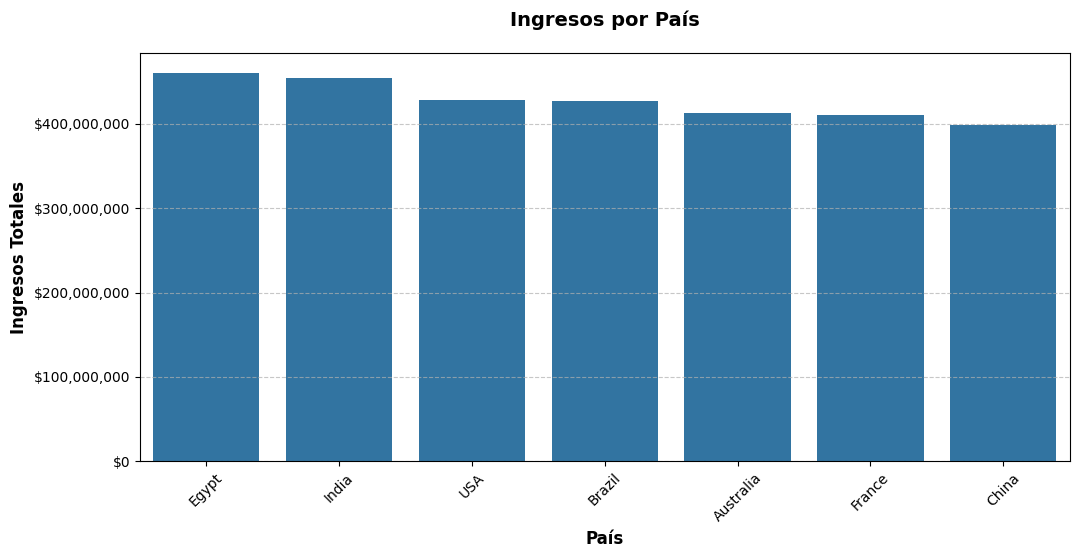

In [25]:
# Agrupar por país y sumar las ganancias
country_revenue = df.groupby("Country")["Revenue"].sum().reset_index()

# Ordenar por ingresos
country_revenue = country_revenue.sort_values(by="Revenue", ascending=False)

# Crear gráfico de barras para las ganancias por país
plt.figure(figsize=(12, 6))
sns.barplot(x=country_revenue["Country"],
            y=country_revenue["Revenue"])

# Aplicar el formateo al eje Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.ylim(0)  # Asegurar que el eje Y comience desde 0

# Configuración del gráfico
plt.xlabel("País", fontweight="bold", fontsize=12)
plt.ylabel("Ingresos Totales", fontweight="bold", fontsize=12)
plt.title("Ingresos por País", fontweight="bold", fontsize=14, pad=20)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.subplots_adjust(bottom=0.2)  # Ajusta el margen inferior si es necesario


# Mostrar el gráfico
plt.show()

**Codificamos las columnas de nuestro dataset para poder generar graficos de relacion**

In [29]:
le = LabelEncoder()

df_cod = df.copy()

df_cod['Country'] = le.fit_transform(df_cod['Country'])
df_cod['Category'] = le.fit_transform(df_cod['Category'])
df_cod['Visitors'] = le.fit_transform(df_cod['Visitors'])
df_cod['Rating'] = le.fit_transform(df_cod['Rating'])
df_cod['Accommodation_Available'] = le.fit_transform(df_cod['Accommodation_Available'])
df_cod['Location'] = le.fit_transform(df_cod['Location'])

**Generamos matriz de correlacion**

In [31]:
corr_matrix = df_cod.corr()
print(corr_matrix)

                         Location   Country  Category  Visitors    Rating  \
Location                 1.000000  0.015212 -0.002936 -0.006522 -0.000464   
Country                  0.015212  1.000000  0.031413  0.008945 -0.014828   
Category                -0.002936  0.031413  1.000000 -0.000346 -0.014258   
Visitors                -0.006522  0.008945 -0.000346  1.000000 -0.010219   
Rating                  -0.000464 -0.014828 -0.014258 -0.010219  1.000000   
Revenue                 -0.008318  0.001352  0.016593  0.008519  0.000574   
Accommodation_Available -0.011368  0.012058  0.006649 -0.027507  0.013922   

                          Revenue  Accommodation_Available  
Location                -0.008318                -0.011368  
Country                  0.001352                 0.012058  
Category                 0.016593                 0.006649  
Visitors                 0.008519                -0.027507  
Rating                   0.000574                 0.013922  
Revenue          

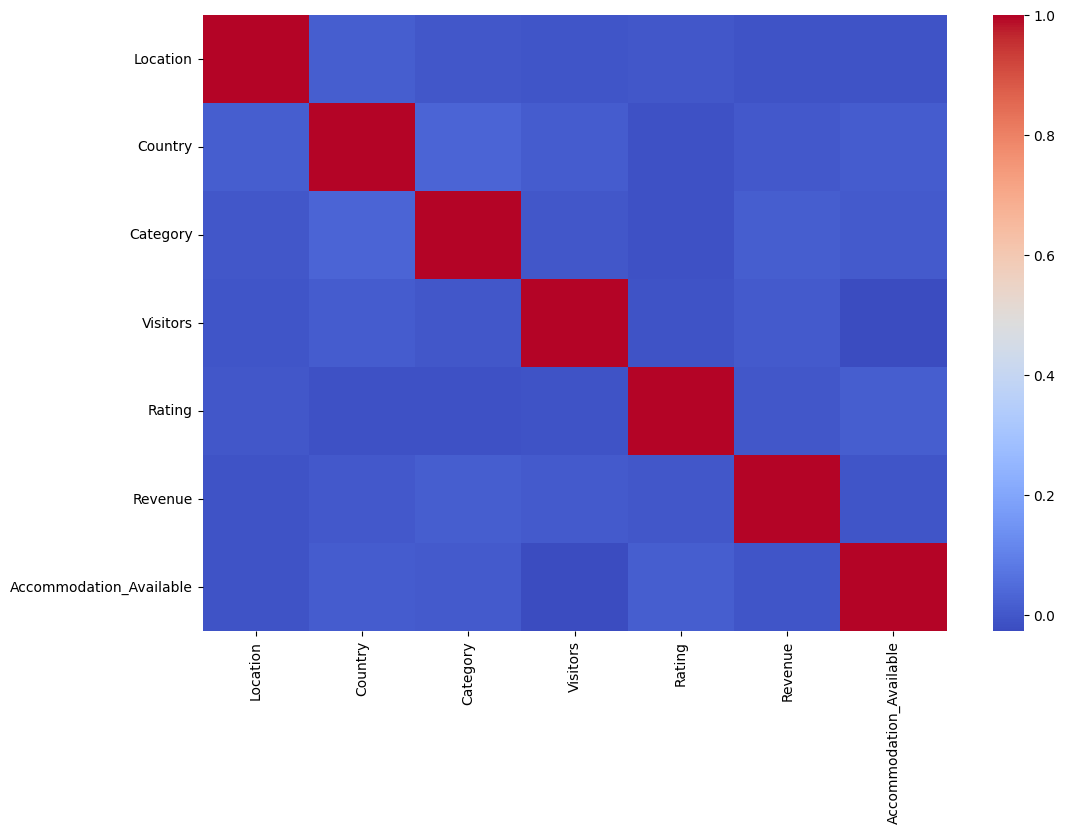

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

**Graficamos la relacion entre Pais y las categorias por las cuales las personas visitan**

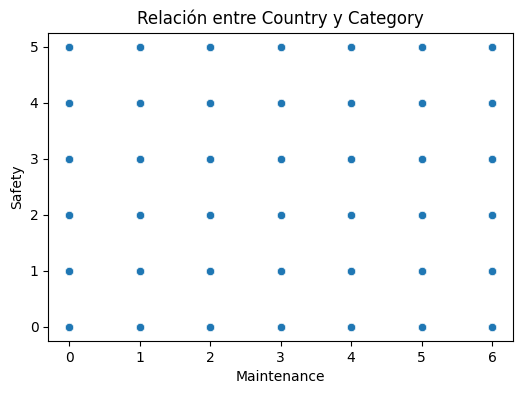

In [36]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_cod, x='Country', y='Category')
plt.title("Relación entre Country y Category")
plt.xlabel("Maintenance")
plt.ylabel("Safety")
plt.show()

**Boxplot de las variables numericas**

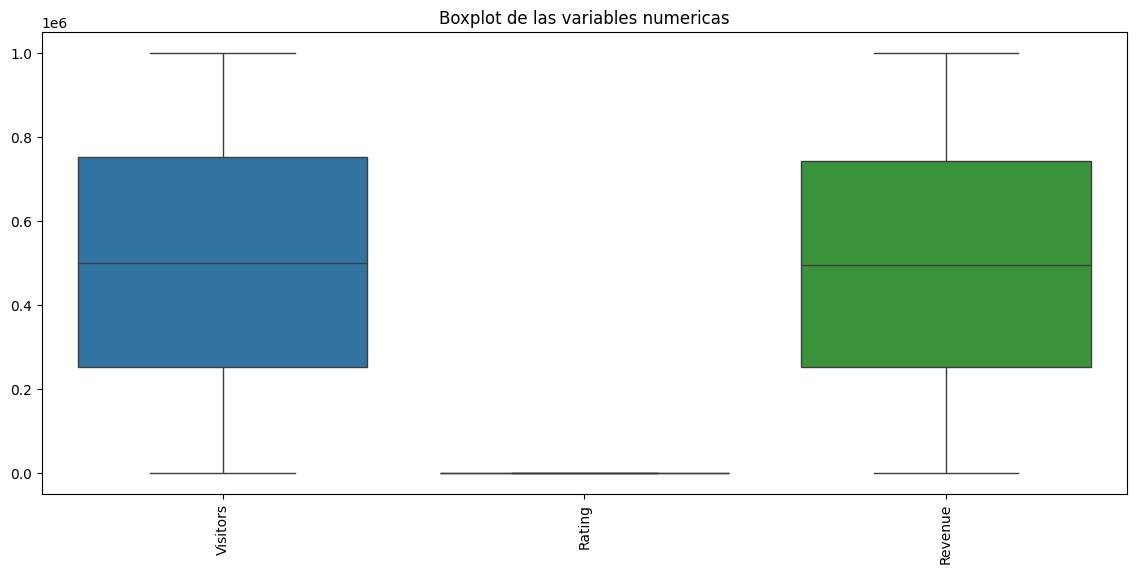

In [34]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.title('Boxplot de las variables numericas')
plt.show()

**Graficamos la distribucion de las categorias de turismo presentes en el dataset**

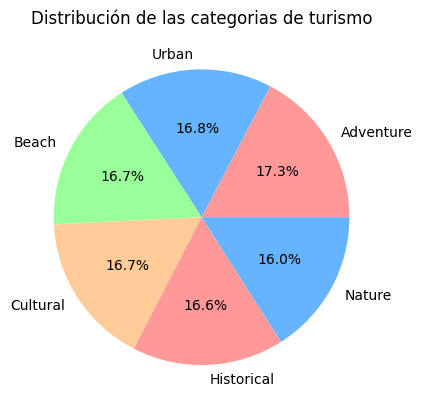

In [38]:
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribución de las categorias de turismo')
plt.ylabel('')
plt.show()